In [ ]:
#Import the necessary methods from tweepy library
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

#Variables that contains the user credentials to access Twitter API 
access_token = "your_access_token"
access_token_secret = "your_access_secret_token"
consumer_key = "your_consumer_key"
consumer_secret = "your_consumer_secret"


#This is a basic listener that just prints received tweets to stdout.
class StdOutListener(StreamListener):

    def on_data(self, data):
        print(data)
        return True

    def on_error(self, status):
        print(status)


if __name__ == '__main__':

    #This handles Twitter authetification and the connection to Twitter Streaming API
    l = StdOutListener()
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    stream = Stream(auth, l)

    #This line filter Twitter Streams to capture data by the keywords: 'honda'
    stream.filter(track=['lebron','LeBron','LEBRON'])

### Then from your terminal, execute this script with output piped to a text file: your_script.py > tweets_data.txt

# Then run this script below to create a Python dataframe of the tweets data

In [22]:
%matplotlib inline
import json
import pandas as pd
import matplotlib.pyplot as plt
from os import path

d = path.dirname('/home/pybokeh/temp/')
#text = open(path.join(d, 'lebron_tweets_data.txt')).read()

tweets_data = []
tweets_file = open(path.join(d, 'lebron_tweets_data.txt'),'r')
for line in tweets_file:
    try:
        tweet = json.loads(line)
        if len(tweet) > 10:                 # Make sure we store complete tweets
            tweets_data.append(tweet)
    except:
        continue

print(len(tweets_data))

2170


In [2]:
tweets_data[2]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sun Mar 22 17:42:16 +0000 2015',
 'entities': {'hashtags': [{'indices': [23, 29], 'text': 'shoes'}],
  'symbols': [],
  'trends': [],
  'urls': [{'display_url': 'ift.tt/1EGrmPo',
    'expanded_url': 'http://ift.tt/1EGrmPo',
    'indices': [0, 22],
    'url': 'http://t.co/VGLmUJgk9K'}],
  'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'filter_level': 'low',
 'geo': None,
 'id': 579699629559816192,
 'id_str': '579699629559816192',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'lang': 'en',
 'place': None,
 'possibly_sensitive': False,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://ifttt.com" rel="nofollow">IFTTT</a>',
 'text': 'http://t.co/VGLmUJgk9K #shoes Nike ricardo tisci Rt air force 1 af1 size 11 jordan lebron kobe kd 1 2 3 4 5 11',
 'timestamp_ms': '14270461366

In [23]:
tweets = pd.DataFrame()
tweets['text']      = [tweet['text'] for tweet in tweets_data]
tweets['lang']      = [tweet['lang'] for tweet in tweets_data]
tweets['retweeted'] = [tweet['retweeted'] for tweet in tweets_data]

In [4]:
tweets

,text,lang,retweeted
0,http://t.co/q2ye1AdLou #fashion Nike ricardo t...,en,False
1,http://t.co/D8yMEryiv1 #fashion LeBron 12 what if,en,False
2,http://t.co/VGLmUJgk9K #shoes Nike ricardo tis...,en,False
3,http://t.co/d7oqXovgcr #shoes LeBron 12 what if,en,False
4,"""@GreatValueCeleb: Great value Lebron's hairli...",en,False
5,RT @BrosConfessions: Lebron better than Jordan...,en,False
6,RT @CauseWereGuys: Lebron better than Jordan? ...,en,False
7,RT @Manstagram_: Rt for Jackie Moon fav for Le...,en,False
8,RT @Manstagram_: Rt for Jackie Moon fav for Le...,en,False
9,RT @otgbasketball: NEW! LeBron Has a Case for ...,en,False


In [24]:
english_tweets = tweets[(tweets['lang']=='en') & (tweets['retweeted']==False)]
english_tweets.drop_duplicates(subset='text');

In [25]:
text = ''
for line in english_tweets['text']:
    text = text + ' ' + line

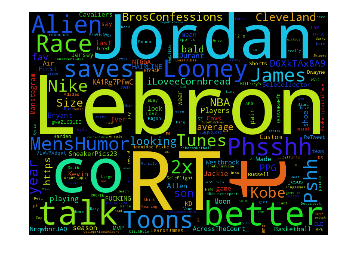

In [26]:
%matplotlib inline
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
d = path.dirname('/home/pybokeh/Downloads/')
# Read the whole text.
#text = strWords
#text = open(path.join(d, 'alice.txt')).read()

"""
additional_words = [
'rt',
'ebay'
]

for word in additional_words:
    STOPWORDS.add(word)"""

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
# honda_mask = imread(path.join(d, "lebron_james_mask.png"), flatten=True)
# wc = WordCloud(background_color="black", max_words=2000, mask=honda_mask, stopwords=STOPWORDS)
wc = WordCloud(width=800, height=600).generate(text)

# generate word cloud
#wc.generate(text)

# store to file
wc.to_file(path.join(d, "lebron_word_cloud_simple.png"))

# show
plt.imshow(wc)
plt.axis("off")
#plt.figure()
#plt.imshow(honda_mask, cmap=plt.cm.gray)
#plt.axis("off")
plt.show()

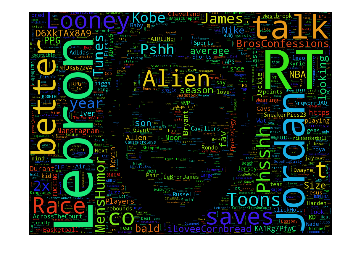

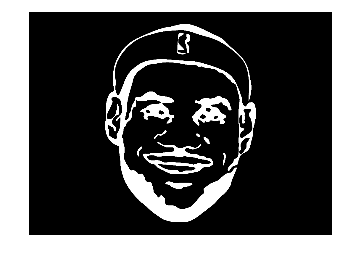

In [21]:
%matplotlib inline
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
d = path.dirname('/home/pybokeh/Downloads/')
# Read the whole text.
#text = strWords
#text = open(path.join(d, 'alice.txt')).read()

"""
additional_words = [
'rt',
'ebay'
]

for word in additional_words:
    STOPWORDS.add(word)"""

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
lebron_mask = imread(path.join(d, "lebron_james_mask.png"), flatten=True)
wc = WordCloud(background_color="black", max_words=2000, mask=lebron_mask, stopwords=STOPWORDS)

# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "lebron_word_cloud_masked.png"))

# show
plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.imshow(lebron_mask, cmap=plt.cm.gray)
plt.axis("off")
plt.show()

In [20]:
wc.process_text(text)[:50]

[('Lebron', 1.0),
 ('RT', 0.5300687285223368),
 ('Jordan', 0.33075601374570446),
 ('better', 0.3088487972508591),
 ('talk', 0.30498281786941583),
 ('Looney', 0.30412371134020616),
 ('saves', 0.30412371134020616),
 ('Alien', 0.30369415807560135),
 ('Race', 0.30326460481099654),
 ('t', 0.28307560137457044),
 ('co', 0.27878006872852235),
 ('Phsshh', 0.25687285223367695),
 ('Toons', 0.25687285223367695),
 ('MensHumor', 0.25171821305841924),
 ('James', 0.125),
 ('2x', 0.07388316151202749),
 ('year', 0.06486254295532647),
 ('Pshh', 0.04768041237113402),
 ('Tunes', 0.04725085910652921),
 ('Kobe', 0.040807560137457045),
 ('looking', 0.040807560137457045),
 ('BrosConfessions', 0.03951890034364261),
 ('bald', 0.036941580756013746),
 ('iLoveeCornbread', 0.036941580756013746),
 ('son', 0.036941580756013746),
 ('D6XkTAx8A9', 0.03479381443298969),
 ('Nike', 0.03350515463917526),
 ('Size', 0.03221649484536082),
 ('fav', 0.03178694158075601),
 ('PPG', 0.0313573883161512),
 ('NBA', 0.0313573883161512),

In [123]:
STOPWORDS

{'',
 'RT',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'eBay',
 'each',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'ought',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 